In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io
import math
from kneed import KneeLocator
import matplotlib.transforms as mtransforms
import tensorflow as tf

In [2]:
from wnp_svm_py.solvers.methodology import compare_baselines,weighted_npsvm, accuracy_report
from wnp_svm_py.solvers.plotgenes import plot_top_genes, plot_weights
from wnp_svm_py.solvers.parameter_search import parameters

Load data

In [3]:
# Load data
meta = pd.read_csv("H:/My Drive/KIRBY PAPERS/GSVD final Analysis/Tularensis/meta_gry.csv")
PreKingry = scipy.io.loadmat('H:/My Drive/KIRBY PAPERS/GSVD final Analysis/Tularensis/PreKingrynorm.mat') # This has been preprocessed as described in Section 3.1
Kingry = scipy.io.loadmat('H:/My Drive/KIRBY PAPERS/GSVD final Analysis/Tularensis/PreKingrynorm_min.mat') # Preprocessed Kingry solved for dimensionality reduction stage
Lungs = Kingry['A']
Spleen = Kingry['B']

Choose $\delta_1$ and $\delta_2$

delta: 0.001
10.72824569860134
9.15448649547198
delta: 0.01
10.72840591722503
9.15449306474905
delta: 0.1
10.729560245440545
9.148270208898396
delta: 1
10.773951434915693
9.078118443348195
delta: 10
10.95456897778272
6.7854390763383945
delta: 100
11.601993931820346
7.836083708170258
delta: 1000
14.014311198304
11.942662442534449


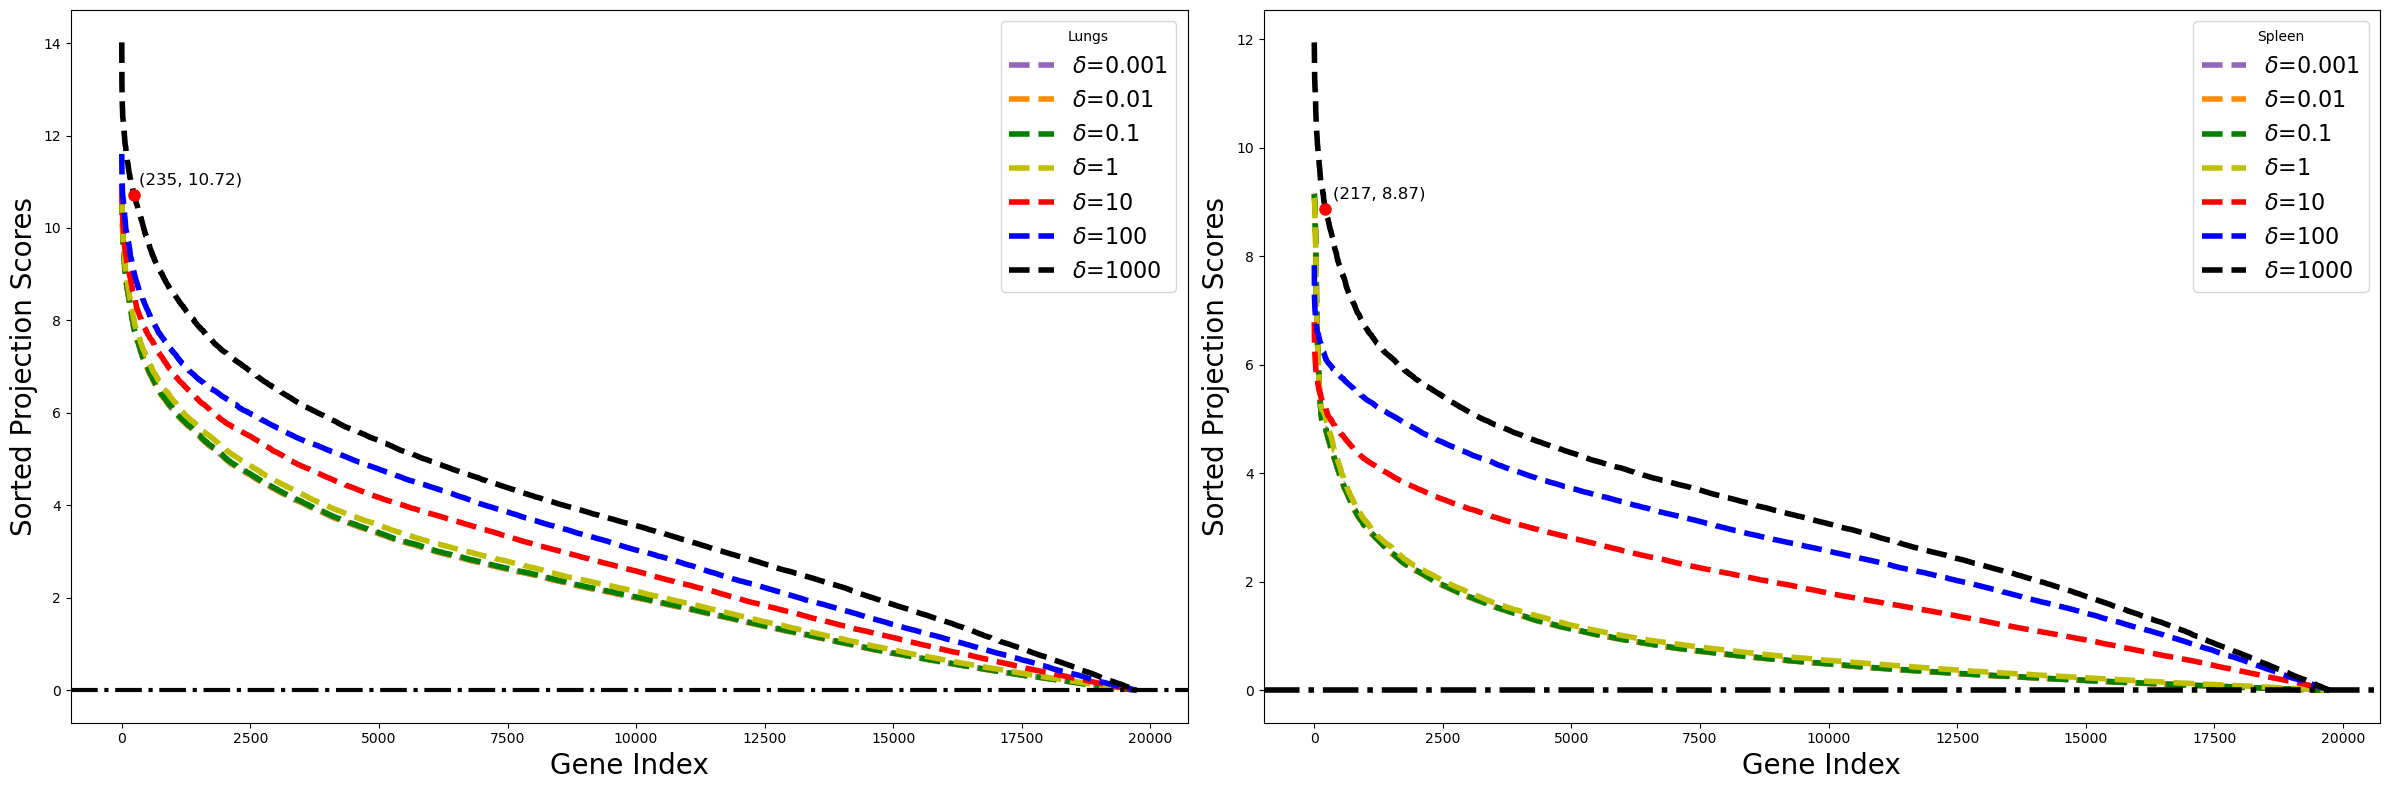

In [4]:
n = Lungs.shape[1]
np.random.seed(10)
ay0 = np.random.rand(n)
by0 = ay0
epsa = 1e-3
q = 1
s = 1
delta = [1e-3,1e-2,1e-1,1,10,100,1000]

Ap, Bp = weighted_npsvm(Lungs,Spleen,ay0,by0,epsa,delta,q,s,'delta')
color = ['tab:purple', 'darkorange', 'g', 'y', 'r', 'b', 'k']
methods = ['$\\delta$=0.001', '$\\delta$=0.01', '$\\delta$=0.1', '$\\delta$=1', '$\\delta$=10', '$\\delta$=100', '$\\delta$=1000']
plot_weights(Ap,Bp,methods,color,['Lungs','Spleen'],'lambda_sensitivity_M_s1')

Choose $\epsilon_1$ and $\epsilon_2$

epsilon: 0.1
10.954735181771957
6.7845506839213146
epsilon: 0.01
11.601875858699792
7.835623137888762
epsilon: 0.001
14.014311198304
11.942662442534449


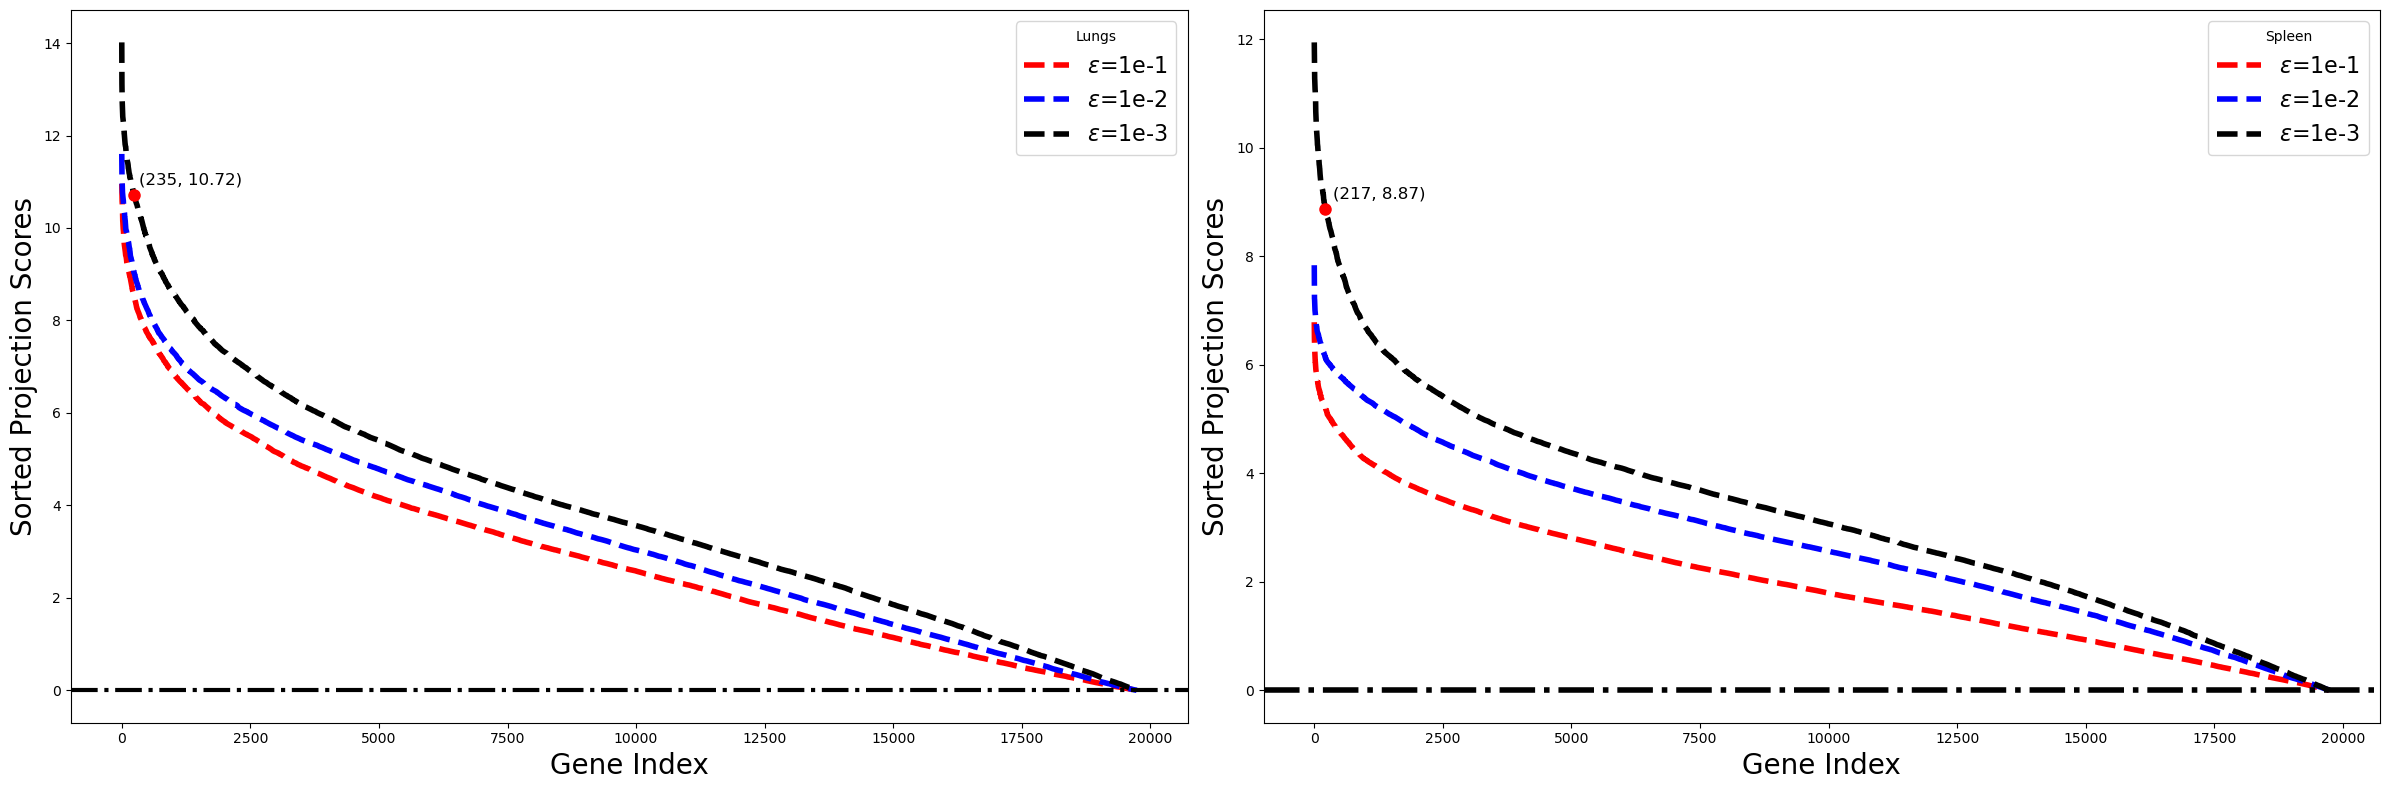

In [5]:
epsa = 1e-3
q = 1 
s = 1
delta = 1000
epsa = [1e-1,1e-2,1e-3]
Ap, Bp = weighted_npsvm(Lungs,Spleen,ay0,by0,epsa,delta,q,s,'epsilon')
c = ['r','b','k']
methods = ['$\epsilon$=1e-1','$\epsilon$=1e-2','$\epsilon$=1e-3']
plot_weights(Ap,Bp,methods,c,['Lungs','Spleen'],'epsilon_sensitivity_M_s1')

Choose parameters for the baseline models

In [ ]:
parameters(meta,Kingry)

Visualize the top genes from the Lungs and Spleen

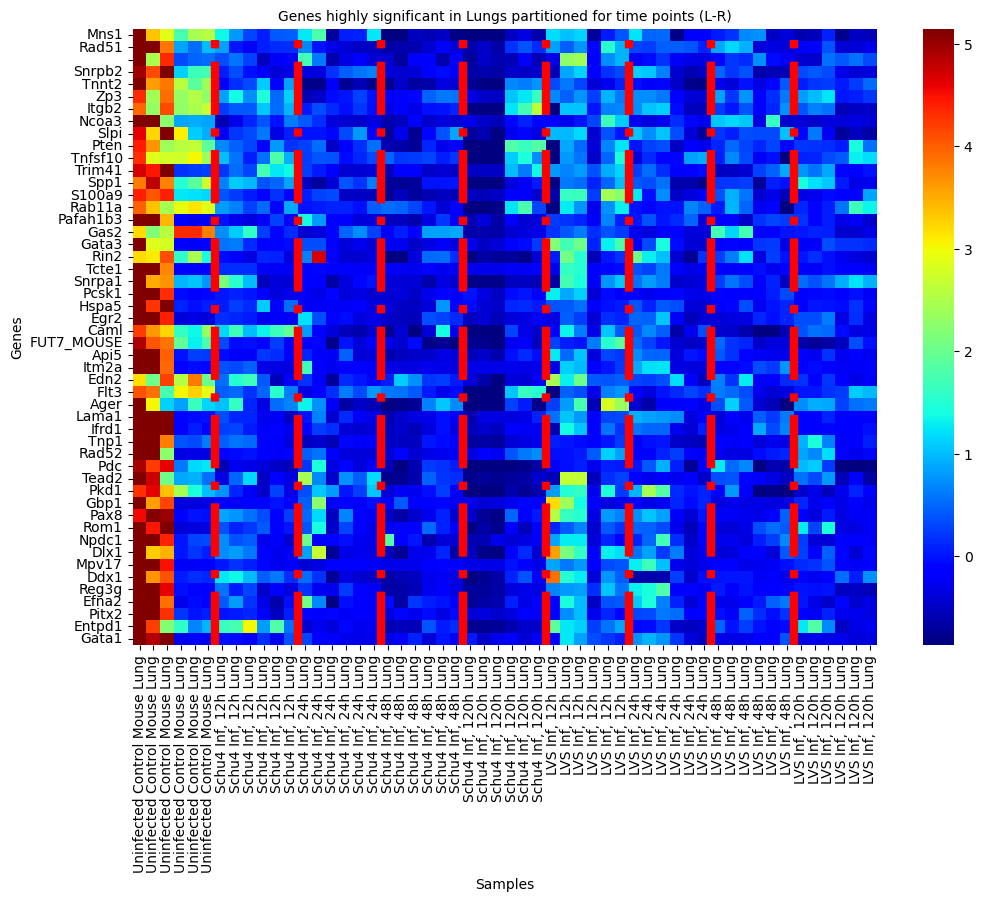

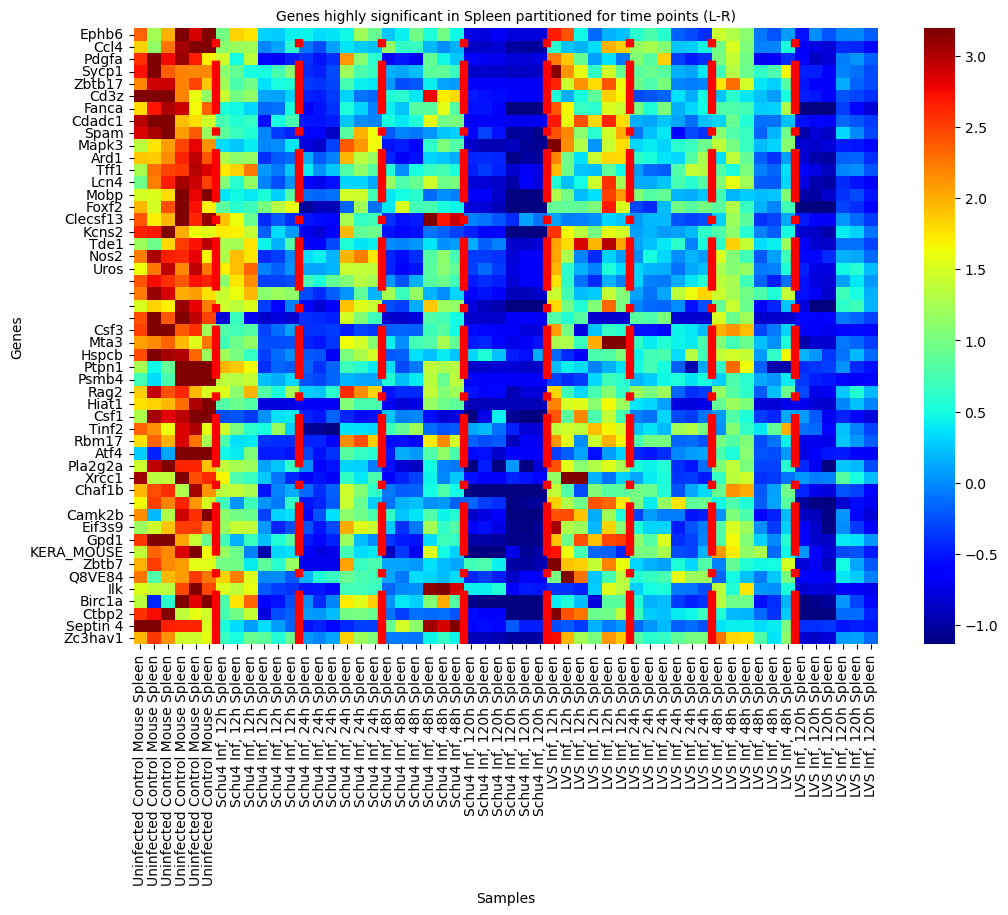

In [4]:
plot_top_genes(meta,Kingry)

Comparisons with baseline algorithms

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 41ms/step
0
1/1 [==============================] - 0s 47ms/step
1
1/1 [==============================] - 0s 41ms/step
2
1/1 [==============================] - 0s 46ms/step
3
1/1 [==============================] - 0s 47ms/step
4
Random Forest: 0.8125 Random Forest: 0.0
Logistic Regression: 0.8333333333333333 Logistic Regression: 0.0
SVM: 0.875 SVM: 0.0
Decision Tree: 0.6041666666666666 Decision Tree: 0.0
Naive Bayes: 0.7291666666666666 Naive Bayes: 0.0
KNN: 0.8125 KNN: 0.0
Adaboost: 0.8958333333333333 Adaboost: 0.0
Gradientboost: 0.8541666666666667 Gradientboost: 0.0
Xgradientboost: 0.75 Xgradientboost: 0.0
ANN: 0.8291666666666666 ANN: 0.015590239111558107
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9166666666666667 $\ell_1$-WNPSVM ($M = \mathcal{L}_1)$: 0.0
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9166666666666667 $\ell_1$-WNPSVM ($M = \mathcal{L}_2)$: 0.0
$\ell_1$-WNPSVM ($\ell_1$-WNPSVM ($M = I$): 0.875 $\el

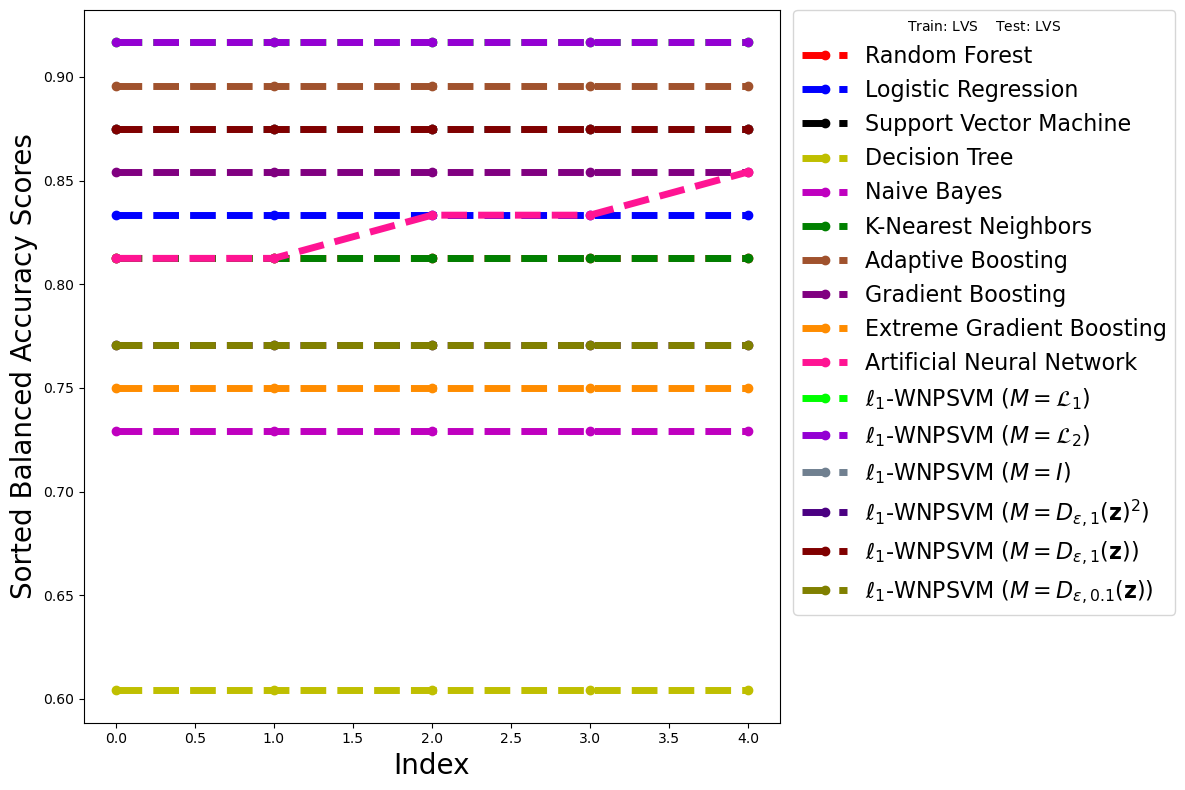

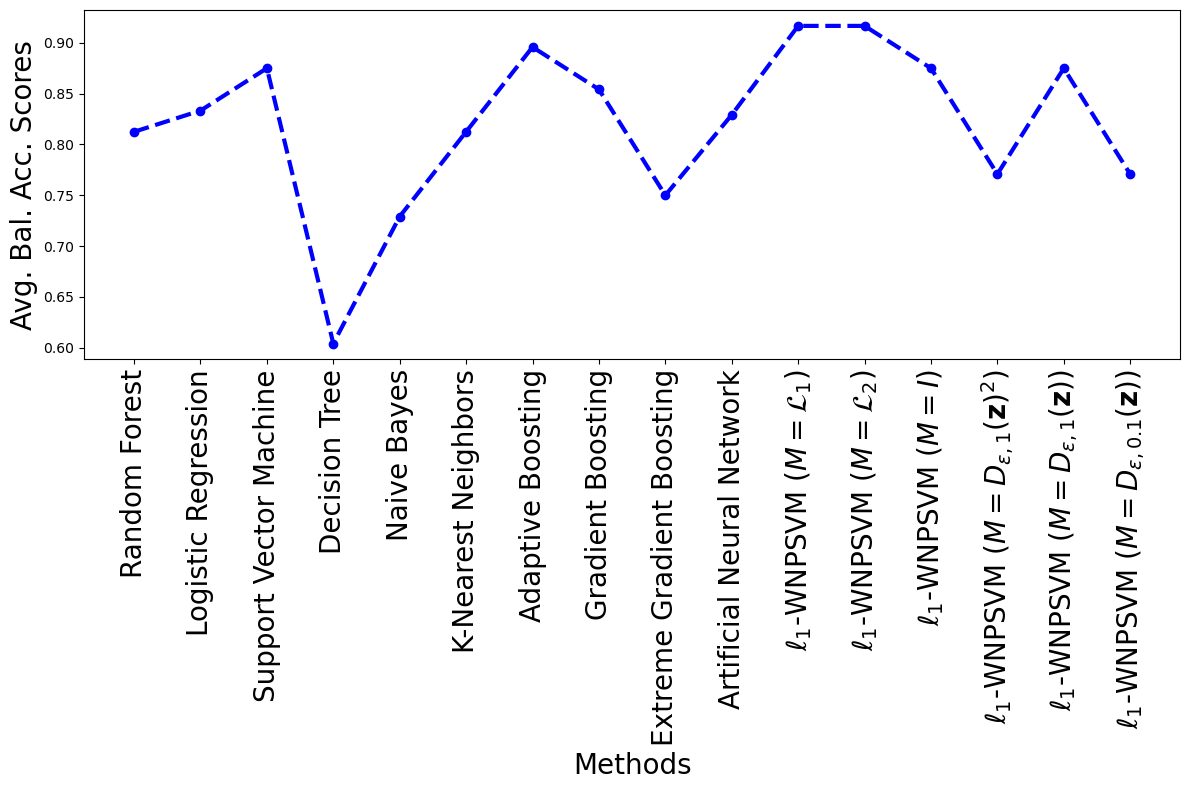

In [6]:
acc = compare_baselines(Kingry,235,5,'Schu4','Schu4')
accuracy_report(acc,5)

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 48ms/step
0
1/1 [==============================] - 0s 47ms/step
1
1/1 [==============================] - 0s 47ms/step
2
1/1 [==============================] - 0s 46ms/step
3
1/1 [==============================] - 0s 49ms/step
4
Random Forest: 0.8583333333333334 Random Forest: 0.008333333333333304
Logistic Regression: 0.8125 Logistic Regression: 0.0
SVM: 0.8541666666666667 SVM: 0.0
Decision Tree: 0.5833333333333333 Decision Tree: 0.0
Naive Bayes: 0.7916666666666667 Naive Bayes: 0.0
KNN: 0.8125 KNN: 0.0
Adaboost: 0.875 Adaboost: 0.0
Gradientboost: 0.8333333333333333 Gradientboost: 0.0
Xgradientboost: 0.8125 Xgradientboost: 0.0
ANN: 0.8249999999999998 ANN: 0.01020620726159654
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9791666666666667 $\ell_1$-WNPSVM ($M = \mathcal{L}_1)$: 0.0
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9791666666666667 $\ell_1$-WNPSVM ($M = \mathcal{L}_2)$: 0.0
$\ell_1$-WNPSVM ($\ell_1$-WNPSVM ($M

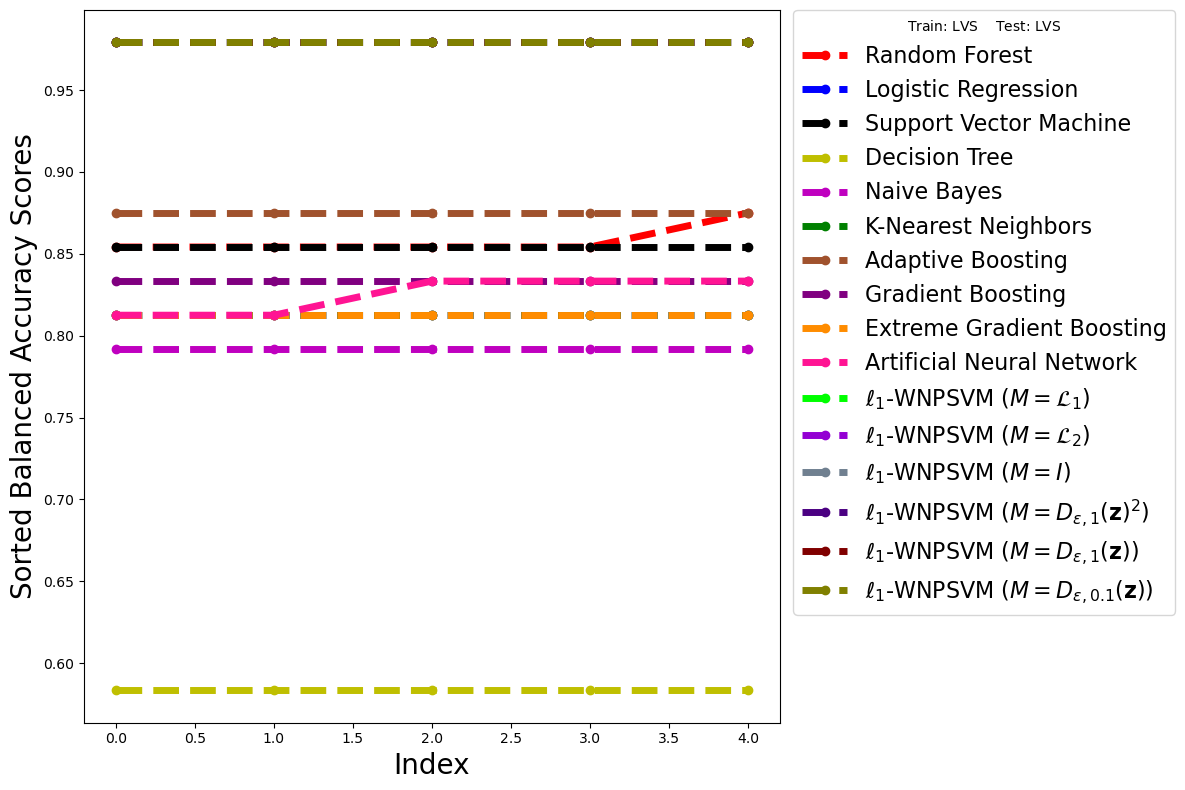

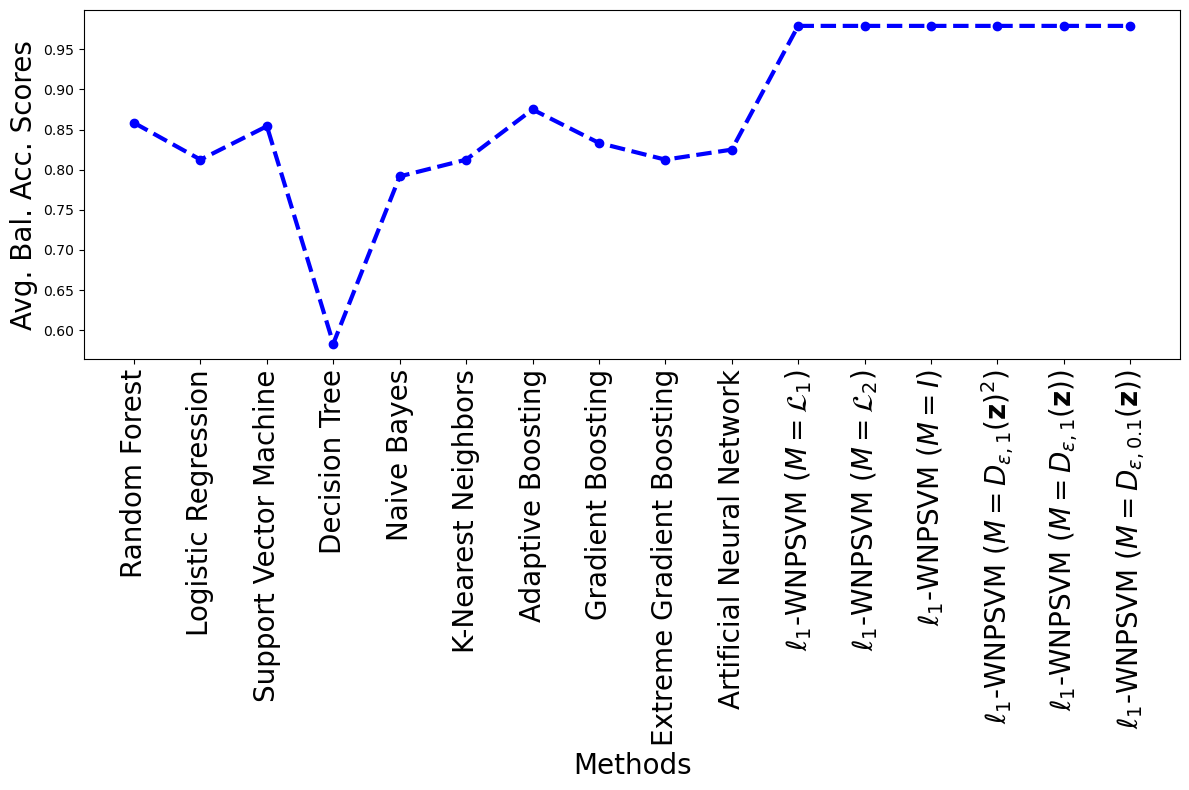

In [7]:
acc = compare_baselines(Kingry,235,5,'Schu4','LVS')
accuracy_report(acc,5)

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 38ms/step
0
1/1 [==============================] - 0s 46ms/step
1
1/1 [==============================] - 0s 41ms/step
2
1/1 [==============================] - 0s 42ms/step
3
1/1 [==============================] - 0s 42ms/step
4
Random Forest: 0.8374999999999998 Random Forest: 0.008333333333333392
Logistic Regression: 0.8333333333333333 Logistic Regression: 0.0
SVM: 0.875 SVM: 0.0
Decision Tree: 0.8541666666666667 Decision Tree: 0.0
Naive Bayes: 0.7708333333333333 Naive Bayes: 0.0
KNN: 0.8541666666666667 KNN: 0.0
Adaboost: 0.875 Adaboost: 0.0
Gradientboost: 0.8541666666666667 Gradientboost: 0.0
Xgradientboost: 0.875 Xgradientboost: 0.0
ANN: 0.8375 ANN: 0.02041241452319316
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9166666666666667 $\ell_1$-WNPSVM ($M = \mathcal{L}_1)$: 0.0
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9375 $\ell_1$-WNPSVM ($M = \mathcal{L}_2)$: 0.0
$\ell_1$-WNPSVM ($\ell_1$-WNPSVM ($M = I$): 0.9166

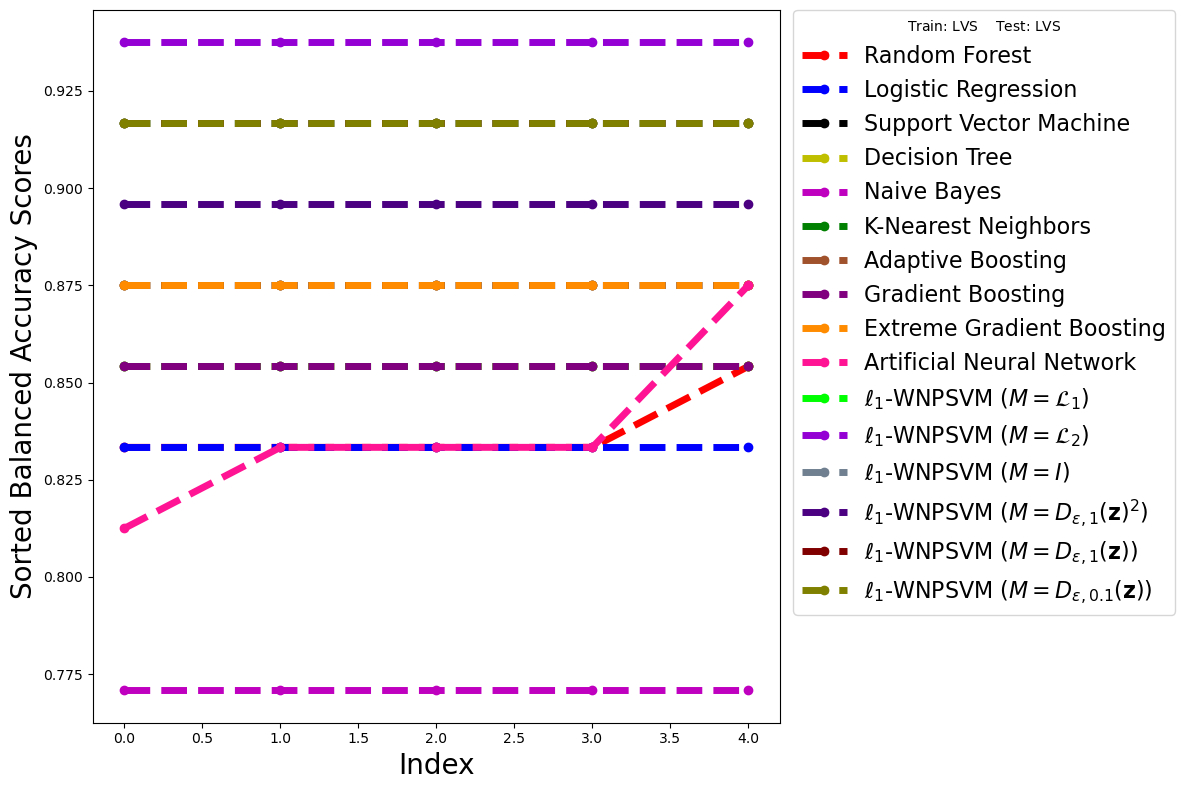

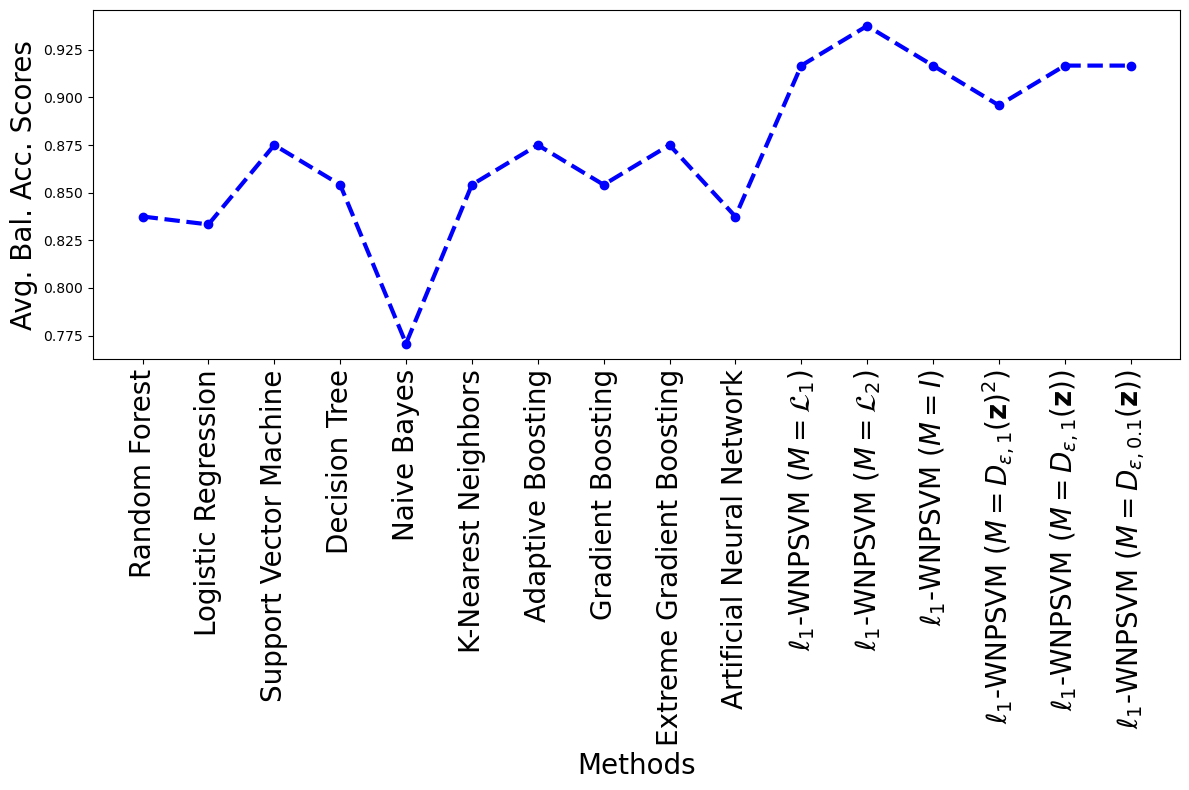

In [8]:
acc = compare_baselines(Kingry,235,5,'LVS','Schu4')
accuracy_report(acc,5)

14.014311198307489
11.942662441983543
1/1 [==============================] - 0s 41ms/step
0
1/1 [==============================] - 0s 42ms/step
1
1/1 [==============================] - 0s 41ms/step
2
1/1 [==============================] - 0s 42ms/step
3
1/1 [==============================] - 0s 47ms/step
4
Random Forest: 0.8791666666666667 Random Forest: 0.008333333333333304
Logistic Regression: 0.8333333333333333 Logistic Regression: 0.0
SVM: 0.875 SVM: 0.0
Decision Tree: 0.8958333333333333 Decision Tree: 0.0
Naive Bayes: 0.7916666666666667 Naive Bayes: 0.0
KNN: 0.8541666666666667 KNN: 0.0
Adaboost: 0.8333333333333333 Adaboost: 0.0
Gradientboost: 0.8541666666666667 Gradientboost: 0.0
Xgradientboost: 0.8958333333333333 Xgradientboost: 0.0
ANN: 0.8166666666666667 ANN: 0.015590239111558034
$\ell_1$-WNPSVM ($M = \mathcal{L}_1$): 0.9583333333333333 $\ell_1$-WNPSVM ($M = \mathcal{L}_1)$: 0.0
$\ell_1$-WNPSVM ($M = \mathcal{L}_2$): 0.9583333333333333 $\ell_1$-WNPSVM ($M = \mathcal{L}_2)$: 0.0

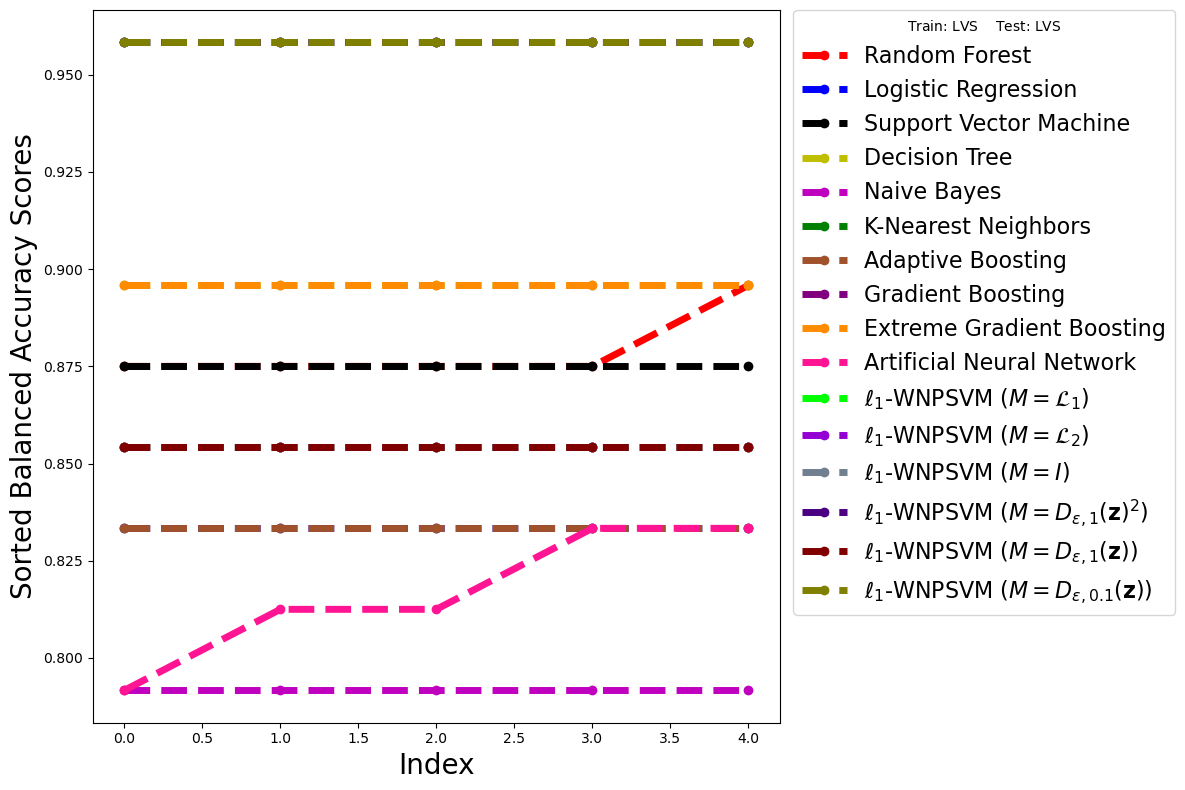

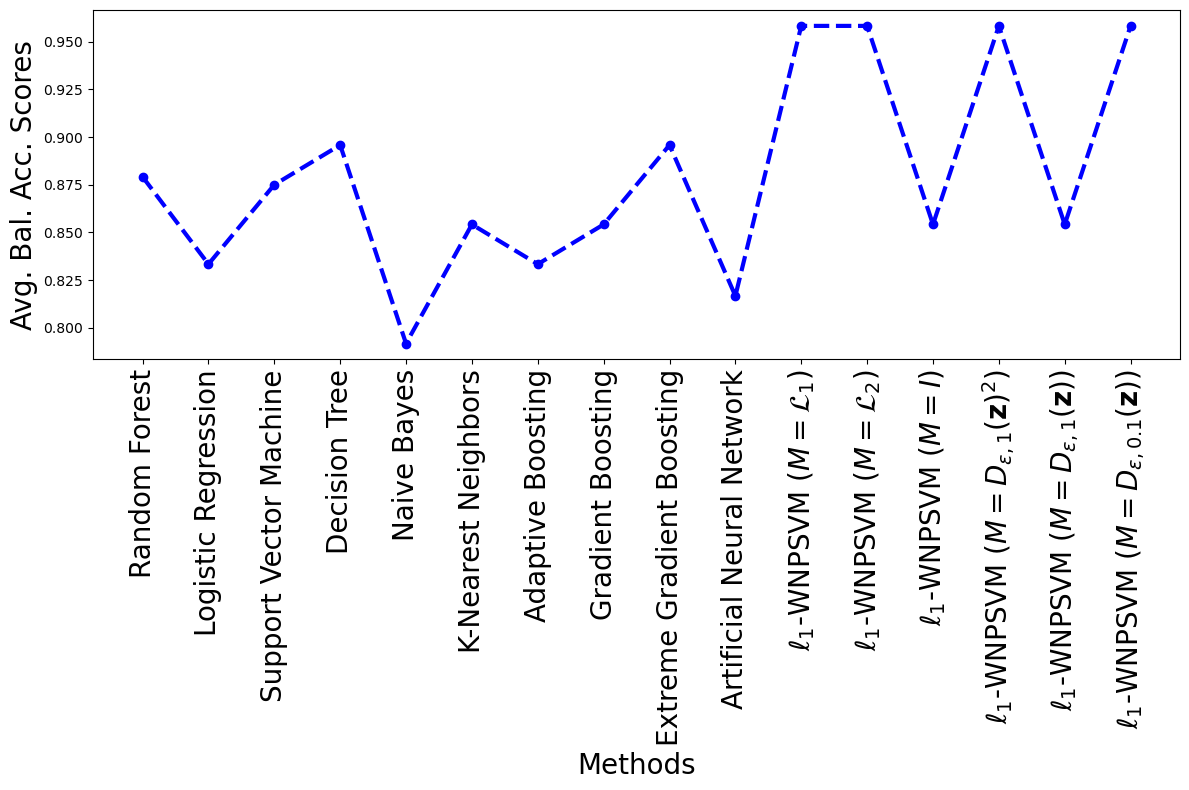

In [9]:
acc = compare_baselines(Kingry,235,5,'LVS','LVS')
accuracy_report(acc,5)